# Advanced Data Analysis - ETE 3

Name: Purusharth Malik

Registration No.: 2348542

## Domain and Problem Statement

  <b>Domain</b>: Meteorology and Renewable Energy, specifically focused on solar energy distribution in the Western Himalayas.
  
  <b>Problem Statement</b>: Analyze and predict the distribution of solar radiation in Western Himalayan regions using ground-measured meteorological data to support solar energy projects. The goal is to accurately predict solar radiation trends and their influencing factors.

## Dataset

  <b>Source</b>: The dataset provided by NIT Hamirpur contains meteorological data such as temperature, humidity, wind speed, wind direction, solar radiation, and more.

  We will be taking the first 100k observations due to computational limitations.

In [5]:
import pandas as pd

file_path = '/content/CR1000_Min_1.dat'

# The dataset is in the form of a .dat file with commas as delimiters
df = pd.read_csv(file_path, delimiter=',',
                 skiprows=[0,2,3])

# Dropping the record column
df = df.drop('RECORD', axis=1)[:100000]

df.head()

,TIMESTAMP,AirTC_Avg,RH,WS_ms_Avg,WindDir,SlrkW_Avg,SlrMJ_Tot,T108_C_Avg,Rain_mm_Tot,BP,BP_EC
0,2012-06-06 11:48:00,29.14,31.51,1.103,77.46,0.552,0.030370,29.87,0.0,899.0,985.0
1,2012-06-06 11:49:00,29.29,31.28,2.014,135.40,0.569,0.034131,29.90,0.0,899.0,985.0
2,2012-06-06 11:50:00,29.23,31.41,2.189,157.90,0.593,0.035554,29.93,0.0,899.0,985.0
3,2012-06-06 11:51:00,29.37,30.94,1.890,210.70,0.577,0.034602,29.96,0.0,899.0,985.0
4,2012-06-06 11:52:00,29.36,31.48,3.002,151.80,0.483,0.028959,29.99,0.0,899.0,985.0


In [6]:
# Looking at the first and last entry
df.head(1), df.tail(1)

(             TIMESTAMP  AirTC_Avg     RH  WS_ms_Avg  WindDir  SlrkW_Avg  \
 0  2012-06-06 11:48:00      29.14  31.51      1.103    77.46      0.552   
 
    SlrMJ_Tot  T108_C_Avg  Rain_mm_Tot     BP  BP_EC  
 0    0.03037       29.87          0.0  899.0  985.0  ,
                  TIMESTAMP  AirTC_Avg    RH  WS_ms_Avg  WindDir  SlrkW_Avg  \
 99999  2012-08-14 22:34:00      24.76  90.5      1.356    192.8        0.0   
 
        SlrMJ_Tot  T108_C_Avg  Rain_mm_Tot     BP  BP_EC  
 99999        0.0       26.73          0.0  900.0  986.0  )

  <b>Initial Data Insight</b>: The dataset contains a timestamp, various meteorological variables, and solar radiation data. This is time-series data, meaning that time-based patterns and seasonality are important.

  The dataset consists of observations recorded every 60 seconds for a time span of over 2 months.

## Data Preprocessing and EDA

In the preprocessing part, we will perform the following steps:

- Parse timestamps and set them as the index.
- Handle any missing values by imputing or interpolating.
- Perform feature scaling if required.
Check for stationarity in the time-series data.
- Create train and test splits for the time-series model.

Let us start with parsing the timestamps and resetting the index,

In [7]:
# Parsing the timestamps
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# Setting the timestamp column as the index
df.set_index('TIMESTAMP', inplace=True)

df.head()

,AirTC_Avg,RH,WS_ms_Avg,WindDir,SlrkW_Avg,SlrMJ_Tot,T108_C_Avg,Rain_mm_Tot,BP,BP_EC
TIMESTAMP,,,,,,,,,,
2012-06-06 11:48:00,29.14,31.51,1.103,77.46,0.552,0.030370,29.87,0.0,899.0,985.0
2012-06-06 11:49:00,29.29,31.28,2.014,135.40,0.569,0.034131,29.90,0.0,899.0,985.0
2012-06-06 11:50:00,29.23,31.41,2.189,157.90,0.593,0.035554,29.93,0.0,899.0,985.0
2012-06-06 11:51:00,29.37,30.94,1.890,210.70,0.577,0.034602,29.96,0.0,899.0,985.0
2012-06-06 11:52:00,29.36,31.48,3.002,151.80,0.483,0.028959,29.99,0.0,899.0,985.0


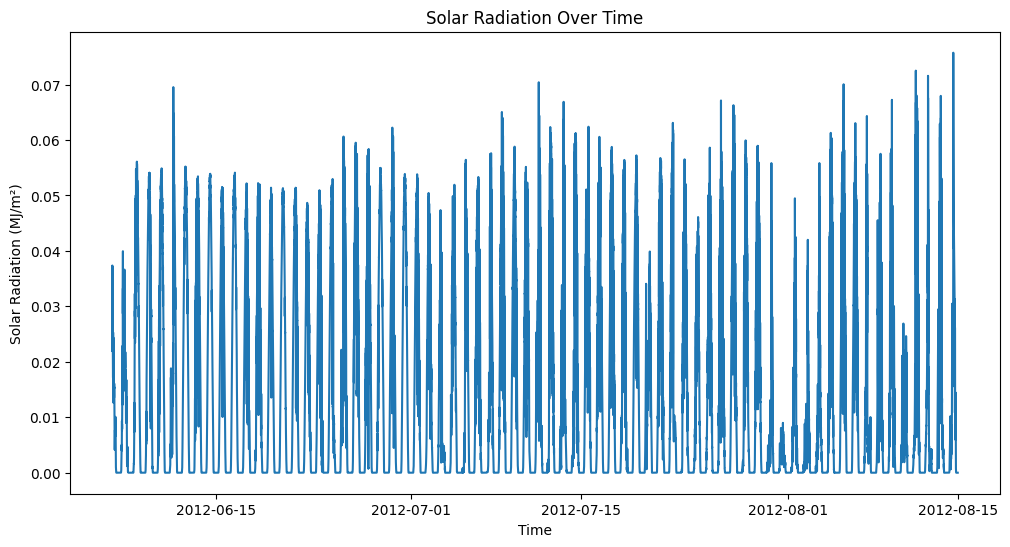

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['SlrMJ_Tot'])
plt.title('Solar Radiation Over Time')
plt.xlabel('Time')
plt.ylabel('Solar Radiation (MJ/m²)')
plt.show()

Handling missing values,

In [8]:
df.interpolate(method='time', inplace=True)

df.head()

,AirTC_Avg,RH,WS_ms_Avg,WindDir,SlrkW_Avg,SlrMJ_Tot,T108_C_Avg,Rain_mm_Tot,BP,BP_EC
TIMESTAMP,,,,,,,,,,
2012-06-06 11:48:00,29.14,31.51,1.103,77.46,0.552,0.030370,29.87,0.0,899.0,985.0
2012-06-06 11:49:00,29.29,31.28,2.014,135.40,0.569,0.034131,29.90,0.0,899.0,985.0
2012-06-06 11:50:00,29.23,31.41,2.189,157.90,0.593,0.035554,29.93,0.0,899.0,985.0
2012-06-06 11:51:00,29.37,30.94,1.890,210.70,0.577,0.034602,29.96,0.0,899.0,985.0
2012-06-06 11:52:00,29.36,31.48,3.002,151.80,0.483,0.028959,29.99,0.0,899.0,985.0


Performing seasonal decomposition,

<Figure size 1600x2400 with 0 Axes>

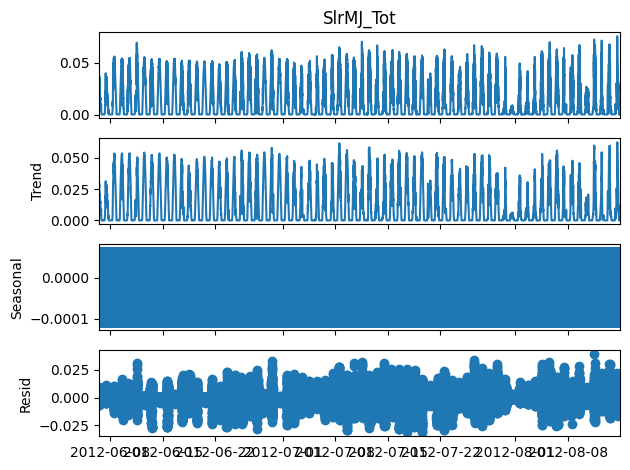

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(16, 24))
result = seasonal_decompose(df['SlrMJ_Tot'], model='additive', period=24)
result.plot()
plt.show()

Now we will check for stationarity in the dataset,

In [9]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

# Testing on the solar radiation column
test_stationarity(df['SlrMJ_Tot'])

ADF Statistic: -10.365450665373139
p-value: 2.336825517804161e-18


Conclusions:

- Stationarity: The time series is likely stationary. The very low p-value (essentially zero) provides strong evidence to reject the null hypothesis of a unit root (non-stationarity) in favor of the alternative hypothesis of stationarity.

- Statistical Significance: The result is highly statistically significant. The extremely small p-value indicates that the probability of observing such a test statistic under the null hypothesis of non-stationarity is virtually zero.

- No Unit Root: We can confidently say that there is no unit root present in the time series. This means the series does not have a time-dependent structure.

- Forecasting Implications: Since the series is stationary, it's suitable for various time series modeling techniques that assume stationarity, such as ARIMA models (without the need for differencing).

- Plotting ACF and PACF,

<Figure size 1200x600 with 0 Axes>

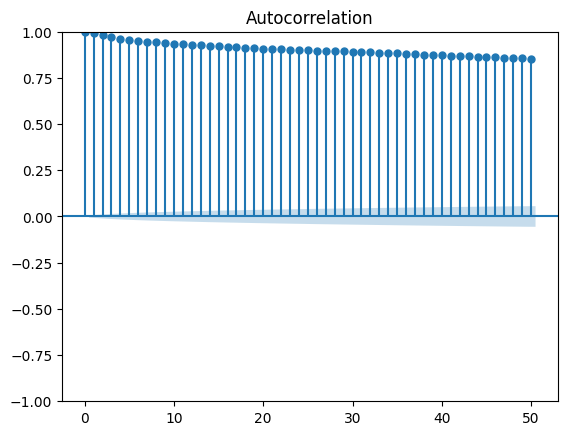

<Figure size 1200x600 with 0 Axes>

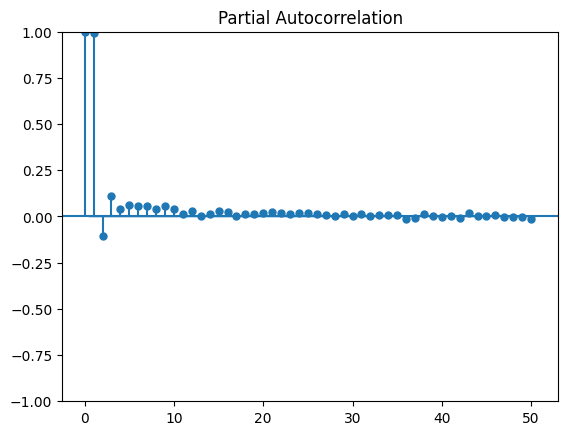

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['SlrMJ_Tot'].dropna(), lags=50)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['SlrMJ_Tot'].dropna(), lags=50)
plt.show()

Let us now create lag features,

In [10]:
for lag in range(1, 8):
    df[f'Lag_{lag}'] = df['SlrMJ_Tot'].shift(lag)

df.head()

,AirTC_Avg,RH,WS_ms_Avg,WindDir,SlrkW_Avg,SlrMJ_Tot,T108_C_Avg,Rain_mm_Tot,BP,BP_EC,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
TIMESTAMP,,,,,,,,,,,,,,,,,
2012-06-06 11:48:00,29.14,31.51,1.103,77.46,0.552,0.030370,29.87,0.0,899.0,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-06 11:49:00,29.29,31.28,2.014,135.40,0.569,0.034131,29.90,0.0,899.0,985.0,0.030370,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-06 11:50:00,29.23,31.41,2.189,157.90,0.593,0.035554,29.93,0.0,899.0,985.0,0.034131,0.030370,NaN,NaN,NaN,NaN,NaN
2012-06-06 11:51:00,29.37,30.94,1.890,210.70,0.577,0.034602,29.96,0.0,899.0,985.0,0.035554,0.034131,0.030370,NaN,NaN,NaN,NaN
2012-06-06 11:52:00,29.36,31.48,3.002,151.80,0.483,0.028959,29.99,0.0,899.0,985.0,0.034602,0.035554,0.034131,0.03037,NaN,NaN,NaN


Since the initial values for lag will be `NaN`, we will drop those,

In [11]:
df.dropna(inplace=True)

Now, we want to remove the target variable and split the dataset for training and testing purposes,

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=False)
features = [col for col in df.columns if col != 'SlrMJ_Tot']

## Machine Learning/Deep Learning Algorithms

We will be training the following models on our data,
- Random Forest Regressor
- ARIMA
- LSTM
- Prophet
- Hybrid ARIMA-LSTM

Let us start with the Random Forest Regressor,

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train[features], train['SlrMJ_Tot'])

RandomForestRegressor()

In [14]:
predictions = rf_model.predict(test[features])

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# List to store metrics for all the algorithms
total_metrics = []

def calculate_metrics(predictions):
  mae = mean_absolute_error(test['SlrMJ_Tot'], predictions)
  rmse = np.sqrt(mean_squared_error(test['SlrMJ_Tot'], predictions))
  mape = np.mean(np.abs((test['SlrMJ_Tot'] - predictions) / test['SlrMJ_Tot'])) * 100
  r2 = r2_score(test['SlrMJ_Tot'], predictions)

  print(f'MAE: {mae}\nRMSE: {rmse}\nMAPE: {mape}\nR2: {r2}')
  return mae, rmse, mape, r2

total_metrics.append(calculate_metrics(predictions))

MAE: 1.435763303881441e-05
RMSE: 0.0002097903386716552
MAPE: inf
R2: 0.9997624626949895


- ARIMA

Since we previously established that the time series data that we have is stationary in nature, we do not need to perform differencing.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (order can be optimized using grid search, here p=5, d=1, q=0)
arima_model = ARIMA(train['SlrMJ_Tot'], order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecasting
arima_pred = arima_fit.forecast(steps=len(test['SlrMJ_Tot']))
total_metrics.append(calculate_metrics(arima_pred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

MAE: 0.008802778699790289
RMSE: 0.016210287955855468
MAPE: nan
R2: -0.4182157887622646


<ipython-input-16-0a3a26ac168b>:10: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['SlrMJ_Tot'] - predictions) / test['SlrMJ_Tot'])) * 100


- LSTM

For LSTM, the most important thing we need to do is reshape the data.

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['SlrMJ_Tot']])

# Creating sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# Reshaping X to be 3D as required by LSTM: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Training the model
lstm_model.fit(X_train, y_train, epochs=20, verbose=0)

# Making predictions
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# For LSTM, the calculate_metrics function is not valid since the split is different
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_mape = np.mean(np.abs((y_test - lstm_predictions) / y_test)) * 100
lstm_r2 = r2_score(y_test, lstm_predictions)

print(f'LSTM - MAE: {lstm_mae}\nRMSE: {lstm_rmse}\nMAPE: {lstm_mape}\nR2: {lstm_r2}')
total_metrics.append((lstm_mae, lstm_rmse, lstm_mape, lstm_r2))

LSTM - MAE: 0.10756314403738754
RMSE: 0.19826918603501473
MAPE: inf
R2: -0.21716326228695126


- Prophet

Facebook's Prophet has been created especially to deal with trend and seasonality.

In [29]:
from prophet import Prophet

# Preparing the data for Prophet
df_prophet = df.reset_index()[['TIMESTAMP', 'SlrMJ_Tot']]
df_prophet.columns = ['ds', 'y']

train_prophet = df_prophet.iloc[:int(0.8*len(df_prophet))]
test_prophet = df_prophet.iloc[int(0.8*len(df_prophet)):]

# Prophet Model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Make predictions
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='min')
forecast = prophet_model.predict(future)

# Extract predictions and evaluate
prophet_predictions = forecast['yhat'].iloc[-len(test_prophet):].values

# Metrics
prophet_mae = mean_absolute_error(test_prophet['y'], prophet_predictions)
prophet_rmse = np.sqrt(mean_squared_error(test_prophet['y'], prophet_predictions))
prophet_mape = np.mean(np.abs((test_prophet['y'] - prophet_predictions) / test_prophet['y'])) * 100
prophet_r2 = r2_score(test_prophet['y'], prophet_predictions)

print(f'Prophet - MAE: {prophet_mae}\nRMSE: {prophet_rmse}\nMAPE: {prophet_mape}\nR2: {prophet_r2}')
total_metrics.append((prophet_mae, prophet_rmse, prophet_mape, prophet_r2))

Prophet - MAE: 0.009935468901119264
RMSE: 0.011731099301058463
MAPE: inf
R2: 0.2572574937683668


- Hybrid (ARIMA & LSTM)

ARIMA -> Captures the linear components

LSTM -> Captures the non-linear Components

In [33]:
# We will calculate the residuals from ARIMA
arima_residuals = arima_fit.resid

# Converting the residuals to numpy array and reshape for scaling
arima_residuals_np = arima_residuals.values.reshape(-1, 1)
scaled_residuals = scaler.fit_transform(arima_residuals_np)

# Creating sequences for LSTM
X_residuals, y_residuals = create_sequences(scaled_residuals, seq_length)

train_size_residuals = int(0.8 * len(X_residuals))
X_train_res, X_test_res = X_residuals[:train_size_residuals], X_residuals[train_size_residuals:]
y_train_res, y_test_res = y_residuals[:train_size_residuals], y_residuals[train_size_residuals:]

# LSTM model for residuals
lstm_model_res = Sequential()
lstm_model_res.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
lstm_model_res.add(Dense(1))
lstm_model_res.compile(optimizer='adam', loss='mse')

lstm_model_res.fit(X_train_res, y_train_res, epochs=20, verbose=0)

lstm_residual_predictions = lstm_model_res.predict(X_test_res)
lstm_residual_predictions = scaler.inverse_transform(lstm_residual_predictions)

# Combining ARIMA predictions and LSTM residual predictions
final_predictions = arima_pred[-len(lstm_residual_predictions):] + lstm_residual_predictions.flatten()

# Metrics for the hybrid model
test_arima = test['SlrMJ_Tot']
hybrid_mae = mean_absolute_error(test_arima[-len(final_predictions):], final_predictions)
hybrid_rmse = np.sqrt(mean_squared_error(test_arima[-len(final_predictions):], final_predictions))
hybrid_mape = np.mean(np.abs((test_arima[-len(final_predictions):] - final_predictions) / test_arima[-len(final_predictions):])) * 100
hybrid_r2 = r2_score(test_arima[-len(final_predictions):], final_predictions)

print(f'Hybrid ARIMA-LSTM - MAE: {hybrid_mae}\nRMSE: {hybrid_rmse}\nMAPE: {hybrid_mape}\nR2: {hybrid_r2}')
total_metrics.append((hybrid_mae, hybrid_rmse, hybrid_mape, hybrid_r2))

Hybrid ARIMA-LSTM - MAE: 0.009491816644499187
RMSE: 0.017201185519734305
MAPE: nan
R2: -0.4351548219848187


<ipython-input-33-0fddb9c03fdb>:33: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  hybrid_mape = np.mean(np.abs((test_arima[-len(final_predictions):] - final_predictions) / test_arima[-len(final_predictions):])) * 100


## Comparing the Models

In [38]:
total_metrics

[(1.435763303881441e-05, 0.0002097903386716552, inf, 0.9997624626949895),
 (0.008802778699790289, 0.016210287955855468, nan, -0.4182157887622646),
 (0.10756314403738754, 0.19826918603501473, inf, -0.21716326228695126),
 (0.009935468901119264, 0.011731099301058463, inf, 0.2572574937683668),
 (0.009491816644499187, 0.017201185519734305, nan, -0.4351548219848187)]

In [43]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'ARIMA', 'LSTM', 'Prophet', 'Hybrid ARIMA-LSTM']
metrics = ['MAE', 'RMSE', 'MAPE', 'R2']

# Creating a DataFrame for the metrics
metrics_df = pd.DataFrame(total_metrics, columns=metrics, index=models)

metrics_df

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,MAE,RMSE,MAPE,R2
Random Forest,0.000014,0.000210,inf,0.999762
ARIMA,0.008803,0.016210,NaN,-0.418216
LSTM,0.107563,0.198269,inf,-0.217163
Prophet,0.009935,0.011731,inf,0.257257
Hybrid ARIMA-LSTM,0.009492,0.017201,NaN,-0.435155


Text(0, 0.5, 'Metrics')

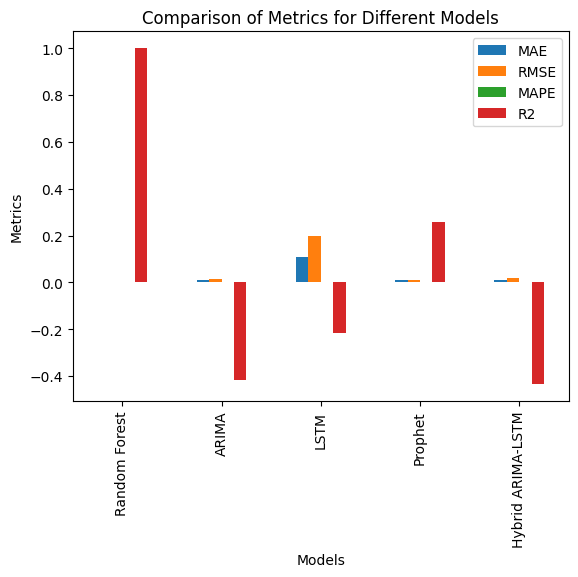

In [45]:
metrics_df.plot(kind='bar')
plt.title("Comparison of Metrics for Different Models")
plt.xlabel("Models")
plt.ylabel("Metrics")

## Conclusions

- <b>Best Performing Model</b>: The Random Forest model outperformed all others, achieving the best results across MAE, RMSE, and R² score. This suggests that ensemble-based approaches like Random Forest are particularly effective at capturing complex patterns in the data. Despite the infinite MAPE, which may be due to calculation issues, Random Forest stands out as the most robust model for this task.

- <b>ARIMA and Prophet</b>: Both ARIMA and Prophet demonstrated moderate performance. While ARIMA struggled with explaining the variance (as evidenced by its negative R² score), Prophet performed better in terms of RMSE and R², making it a more reliable choice among classical time-series models.

## Discussing the failure of Deep Learning Models

The deep learning models (LSTM and Hybrid ARIMA-LSTM) did not perform well on this dataset. The LSTM’s high error rates and negative R² suggest that it was unable to learn the appropriate temporal dependencies, potentially due to overfitting or insufficient complexity in the data. Similarly, the hybrid approach did not enhance performance, indicating that combining linear and non-linear models might not always yield better results.

<b>However, this result might change when the complete data is taken into consideration. Since we do not have access to that kind of compute, we can not know for sure.

Another technique that might yield better results is to fine-tune the hyperparameters for the LSTM and hybrid models.</b>

# End